# Ejercicio: Diseña una clase `Visualizer` para análisis exploratorio de variables numéricas

Como Data Scientist, necesitarás constantemente explorar y comunicar cómo se comportan las variables en un conjunto de datos. En este ejercicio, deberás diseñar una clase que facilite la generación rápida de gráficos básicos para **variables numéricas**.

#### 1. Generar un DataFrame ficticio de marketing

Usa `numpy` y `pandas` para crear un DataFrame que cumpla las siguientes características:

- 1000 registros simulados.

- Columnas:

  - `age`: Edad del usuario (entre 18 y 65 años).

  - `income`: Ingreso mensual en euros (entre 800€ y 5000€).

  - `spending_score`: Puntuación de gasto (entre 0 y 100).

  - `campaign_clicks`: Número de veces que el usuario ha hecho clic en campañas (entre 0 y 10).

  - `membership_years`: Años de antigüedad como cliente (entre 0 y 15 años).


In [80]:
#importación de las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [81]:
#reutilización de la función que genera valores aleatorios
def generar_numeros_enteros_aleatorios(N, minimo, maximo):
    rand_list = np.random.randint(minimo, maximo, size=N)
    rand_list = rand_list.tolist()
    return rand_list

In [82]:
#generación aleatoria del dataset en forma de diccionario

#income tendrá outliers
income_1 = generar_numeros_enteros_aleatorios(900, 800, 5000)
income_2 = generar_numeros_enteros_aleatorios(60, 100, 799)
income_3 = generar_numeros_enteros_aleatorios(40, 5001, 8000)

income = np.concatenate([income_1, income_2, income_3])

marketing = {
    'age': generar_numeros_enteros_aleatorios(1000, 18, 65),
    'income': income,
    'spending_score': generar_numeros_enteros_aleatorios(1000, 0, 100),
    'campaign_clicks': generar_numeros_enteros_aleatorios(1000, 0, 10),
    'membership_years': generar_numeros_enteros_aleatorios(1000, 0, 15)
}

#conversión a pd.DataFrame
marketing_df = pd.DataFrame(marketing)
marketing_df.head()

,age,income,spending_score,campaign_clicks,membership_years
0,52,1562,59,0,11
1,59,1835,54,7,13
2,63,4153,54,1,12
3,19,4203,18,8,13
4,62,3678,35,1,5




#### 2. Crear una clase llamada `Visualizer`

Esta clase debe:

- Inicializarse con un `pandas.DataFrame`.

- Incluir métodos para:

  - `plot_histogram(columna)`: dibuja un histograma de una variable.

  - `plot_boxplot(columna)`: dibuja un diagrama de caja (boxplot) de una variable.

  - `plot_scatter(columna_x, columna_y)`: dibuja un gráfico de dispersión entre dos variables.

- Cada método debe permitir opcionalmente:

  - Cambiar el **color** del gráfico.

  - Añadir un **título personalizado**.

  - Mostrar o no la **rejilla** (`grid=True/False`).

- Requisitos técnicos

  - Utiliza **Seaborn** para crear los gráficos.

  - Utiliza `matplotlib` solamente para `plt.show()`.

  - El diseño del código debe ser **modular** y **reutilizable** para cualquier `DataFrame`.

  - El objetivo es que la clase funcione tanto para este conjunto de datos como para **cualquier otro**.



In [83]:
class Visualizer:
    def __init__(self, df):
        self.df = df
    def histogram(self, columna, color, title):
        sns.histplot(data=self.df, x=columna, color=color)
        plt.title(title)
        plt.show()
    def boxplot(self, columna, color, title):
        sns.boxplot(data=self.df, y=columna, color=color)
        plt.title(title)
        plt.show()
    def plot_scatter(self, columna_x, columna_y, color, title):
        sns.scatterplot(data=self.df, x=columna_x, y=columna_y, color=color)
        plt.title(title)
        plt.show()
    


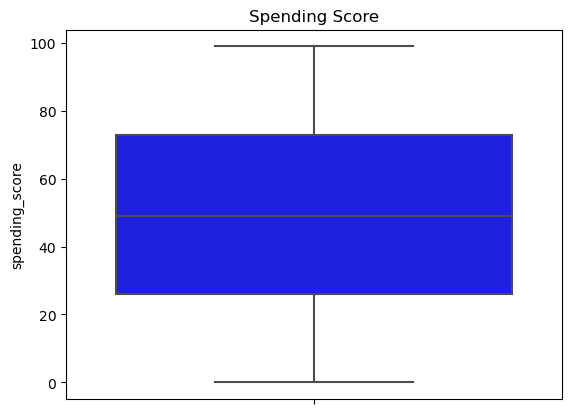

c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


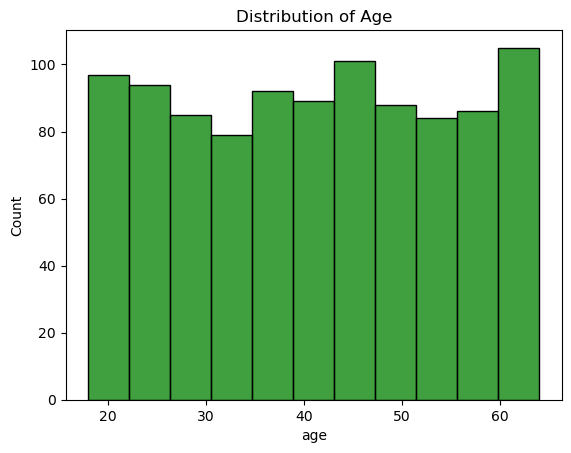

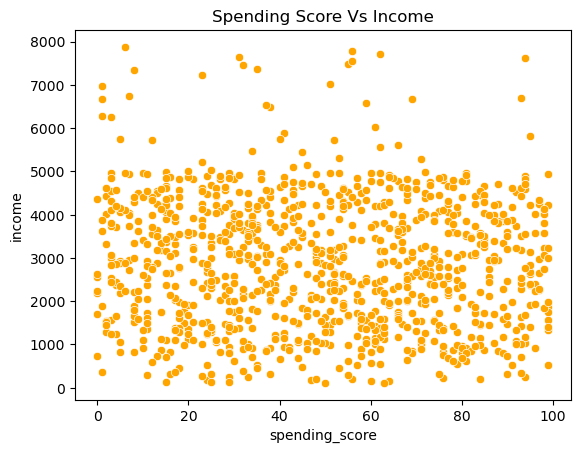

In [84]:
visualizador = Visualizer(df=marketing_df)
visualizador.boxplot(columna='spending_score', color='blue', title='Spending Score')
visualizador.histogram(columna='age', color='green', title='Distribution of Age')
visualizador.plot_scatter(columna_x='spending_score', columna_y='income', color='orange', title='Spending Score Vs Income')


# Ejercicios Avanzados de Visualización

Una vez que completes la clase `Visualizer`, sigue mejorando tus habilidades creando nuevas clases especializadas en visualización:


#### 1. Clase `FeaturePlotter`

El objetivo principal de este ejercicio es automatizar la exploración gráfica de **una única variable** en diferentes formatos. Las tareas que debes realizar son:

- Inicializar con un `DataFrame`.

- Métodos para:

  - `plot_distribution(columna)`: Mostrar histograma + KDE en una misma figura.

  - `plot_violin(columna)`: Dibujar un violin plot de la variable.

  - `plot_box_and_strip(columna)`: Mostrar un boxplot combinado con un stripplot.


In [85]:
class FeaturePlotter:
    def __init__(self, df):
        self.df = df
    def histogram(self, columna, color, title, kde):
        sns.histplot(data=self.df, x=columna, color=color, kde=kde)
        plt.title(title)
        plt.show()
    def violin(self, columna, color, title):
        sns.violinplot(data=self.df, x=columna, color=color, alpha=0.6)
        plt.title(title)
        plt.show()
    def boxstrip(self, columna, color, title):
        sns.boxplot(data=self.df ,x=columna, color=color)
        sns.stripplot(data=self.df, x=columna, jitter=True, color=color, alpha=0.6)

c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


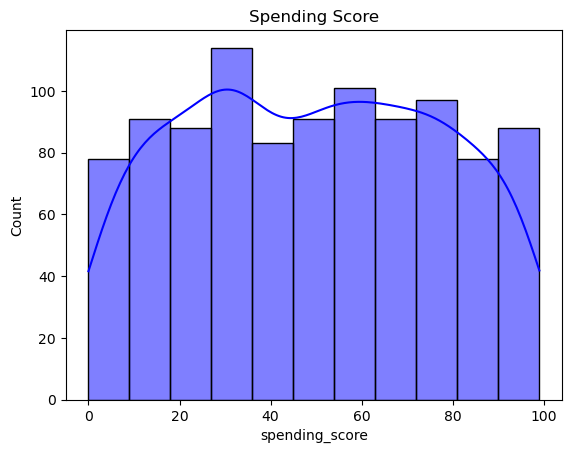

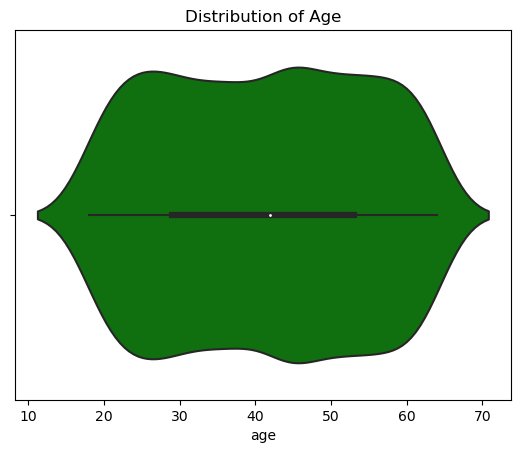

c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


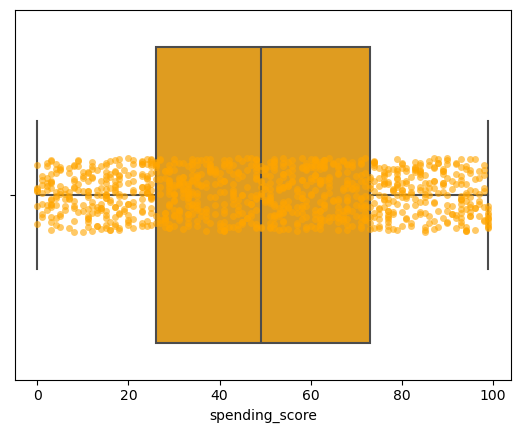

In [86]:
featureplotter = FeaturePlotter(df=marketing_df)
featureplotter.histogram(columna='spending_score', color='blue', title='Spending Score', kde=True)
featureplotter.violin(columna='age', color='green', title='Distribution of Age')
featureplotter.boxstrip(columna='spending_score', color='orange', title='Spending Score')




#### 2. Clase `ComparativeVisualizer`

Su objetivo principa es comparar dos o más variables en un único gráfico. Tu tareas serán:


- Inicializar con un `DataFrame`.

- Métodos para:

  - `compare_histograms(columnas)`: Dibujar varios histogramas en la misma figura (superpuestos o separados).

  - `compare_boxplots(columnas)`: Dibujar varios boxplots uno al lado del otro.



In [87]:
class ComparativeVisualizer:
    def __init__(self, df):
        self.df = df
    def compare_hist(self, columna_1, columna_2, color1, color2, title):
        sns.histplot(data=self.df, x=columna_1, color=color1, alpha=0.6, stat='probability')
        sns.histplot(data=self.df, x=columna_2, color=color2, alpha=0.6, stat='probability')
        plt.title(title)
        plt.show()
    def compare_box(self):
        num_var = self.df.select_dtypes(include=['number']).columns
        n_cols = 4
        n_rows = (len(num_var) // n_cols) + (1 if len(num_var) % n_cols > 0 else 0)

        plt.figure(figsize=(5 * n_cols, 4 * n_rows))
        for i, var in enumerate(num_var):
            plt.subplot(n_rows, n_cols, i+1)
            sns.boxplot(data=self.df, y=var)
            plt.title(f"{var}")
            plt.subplots_adjust(right=2.8)
        plt.tight_layout()
        plt.show()
            

c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


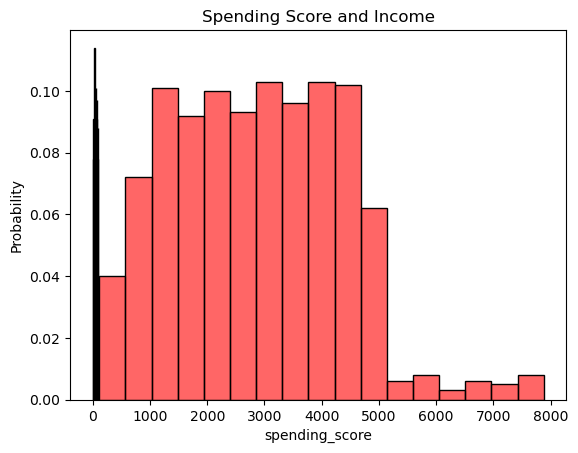

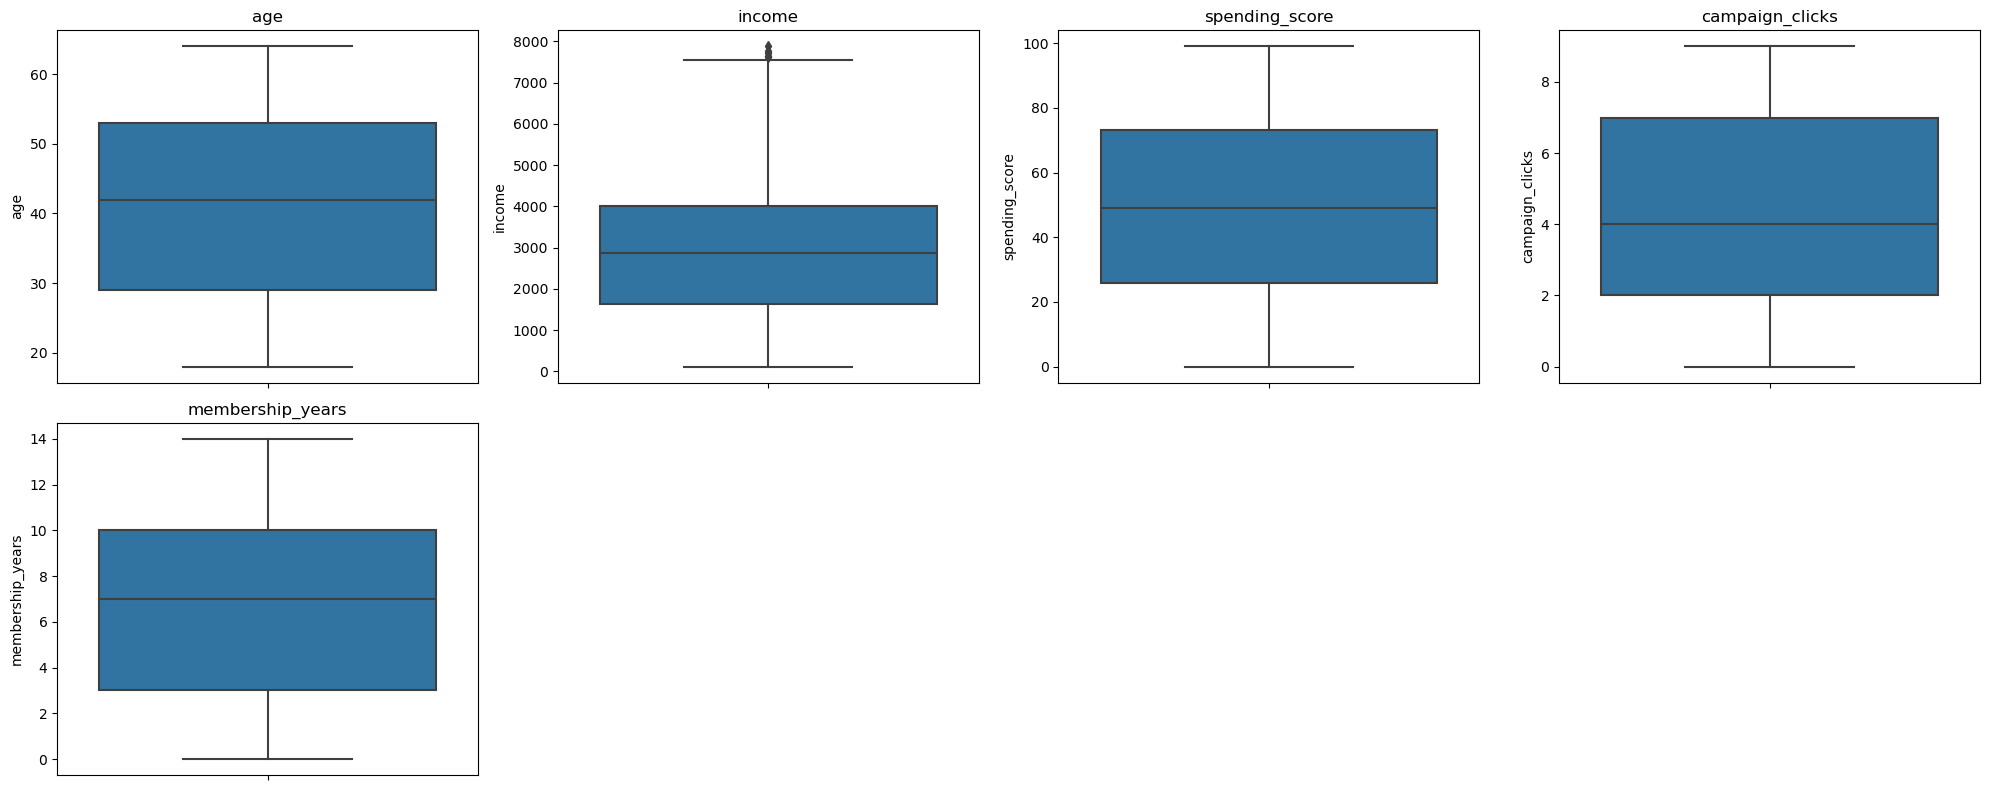

In [88]:
comparativevisualizer =ComparativeVisualizer(df=marketing_df)
comparativevisualizer.compare_hist(columna_1='spending_score', columna_2='income', color1='blue',color2='red', title='Spending Score and Income')
comparativevisualizer.compare_box()


#### 3. Clase `OutlierPlotter`

Su objetivo será visualizar claramente los valores atípicos.

- Inicializar con un `DataFrame`.

- Métodos para:

  - `plot_boxplot_outliers(columna)`: Boxplot que resalte visualmente los outliers.

  - `plot_scatter_outliers(x, y)`: Scatter plot destacando los puntos considerados outliers usando otra forma/color.


*(Los outliers pueden ser definidos manualmente o usando IQR dentro de la clase o ambas)*



In [102]:
class OutlierPlotter:
    def __init__(self, df):
        self.df = df
    
    def outlier_detect(self, column):
        Q1 = self.df[column].quantile(0.25)
        Q3 = self.df[column].quantile(0.75)
        IQR = Q3 - Q1
        limite_superior = Q3 + 1.5 * IQR
        limite_inferior = Q1 - 1.5 * IQR
        return (self.df[column] > limite_superior) | (self.df[column] < limite_inferior)
    
    def boxplot_outliers(self, column):    
        outliers = self.outlier_detect(column=column)
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=self.df[column])
        sns.stripplot(x=self.df[column][outliers], color='red', size=6, jitter=True, label='Outliers')
        plt.title(f'Boxplot con Outliers resaltados para la variable {column}')
        plt.legend()
        plt.show()

In [103]:
outlierplotter = OutlierPlotter(df=marketing_df)
outl_presence = outlierplotter.outlier_detect(column='income')

c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


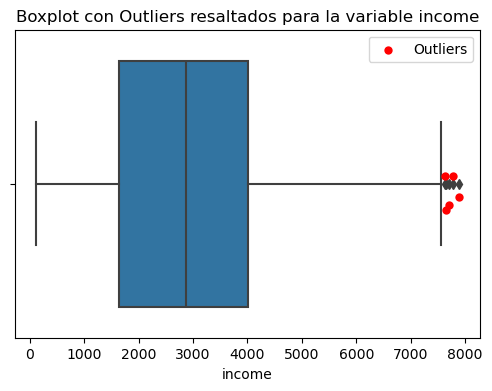

In [104]:
outlierplotter.boxplot_outliers(column='income')


#### 4. Clase `CorrelationPlotter`

**Objetivo:** Analizar y visualizar las correlaciones entre variables. Las tareas que tendras que realizar son:

- Inicializar con un `DataFrame`.

- Métodos para:

  - `plot_heatmap()`: Dibujar un heatmap de la matriz de correlación.

  - `plot_pairplot(columnas)`: Dibujar un pairplot de Seaborn para las variables seleccionadas.



#### 5. Clase `DashboardPlotter` (Avanzado)

El objetivo es crear un pequeño "dashboard" de visualización. Tis tareas serán:

- Inicializar con un `DataFrame`.

- Método `create_dashboard(columnas)` que:

  - Genere automáticamente varios gráficos (histogramas, scatter plots, boxplots) para las variables seleccionadas.

  - Organice los gráficos en subplots (`matplotlib`).


#### Nivel extra: Mini-proyecto final

> Construye un pequeño **módulo de análisis visual** de datasets de marketing, combinando varias de tus clases (`FeaturePlotter`, `CorrelationPlotter`, `DashboardPlotter`) en un flujo completo.

El objetivo será simular un flujo de trabajo real de análisis exploratorio visual de datos (EDA).